# DSCI100 Individual Plan


Github link: https://github.com/annixu921-creator/Dsci-100-group-project.git

### Importing Data

In [27]:
library(tidyverse)

url = "http://drive.google.com/uc?rxport-download&id=19dtTv9I4hUdTKPBrM1QgI3A0ru68ssds"
players <- read_csv(url)
dim(players); head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [41]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |> summarize(max(played_hours), min(played_hours), max(Age, na.rm = TRUE), min(Age, na.rm = TRUE))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),"max(Age, na.rm = TRUE)","min(Age, na.rm = TRUE)"
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,58,9


## 1) Data Description

The **`players`** dataset contains **196 observations and 7 variables.**  
    Variables include: 

+ **`experience`**, charactor, experience level of the player, levels include `Beginner`, `Regular`, `Amateur`, `Veteran`, `Pro`. 
+ **`subscribe`**, logical, whether player is subcribed to game-related newsletter, either `True` or `False`.
+ **`hashedEmail`**, charactor, records the hashed Email address of players.
+ **`played_hours`**, double, records the hours of video game played. 
+ **`name`**, charactor, first name of the player.
+ **`gender`**, charactor, gender of the player, include `Male`, `Female`, `Non-Binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, and `Other`. 
+ **`Age`**, double, Age of the player.

### Potential Issues

1. `played_hours` may not reflect true playtime, players could be on the game but afk, away from keyboard.
2. `Age` may not be accurate as people may lie about their birthday, systematic measurement error.
3. unable to decode the emails in `hashedEmail`,  the variable may not be that useful.

## 2) Questions

#### Broad Question 1: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific Question: 
What player's: `Age`, `played_hours`, `experience`, `Gender` are most predictive of subscribing to a game-related newsletter.  
In other words, how will the above predicators act when `subscribe` = `True`?

## 3) Exploratory Data Analysis and Visualization

In [50]:
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


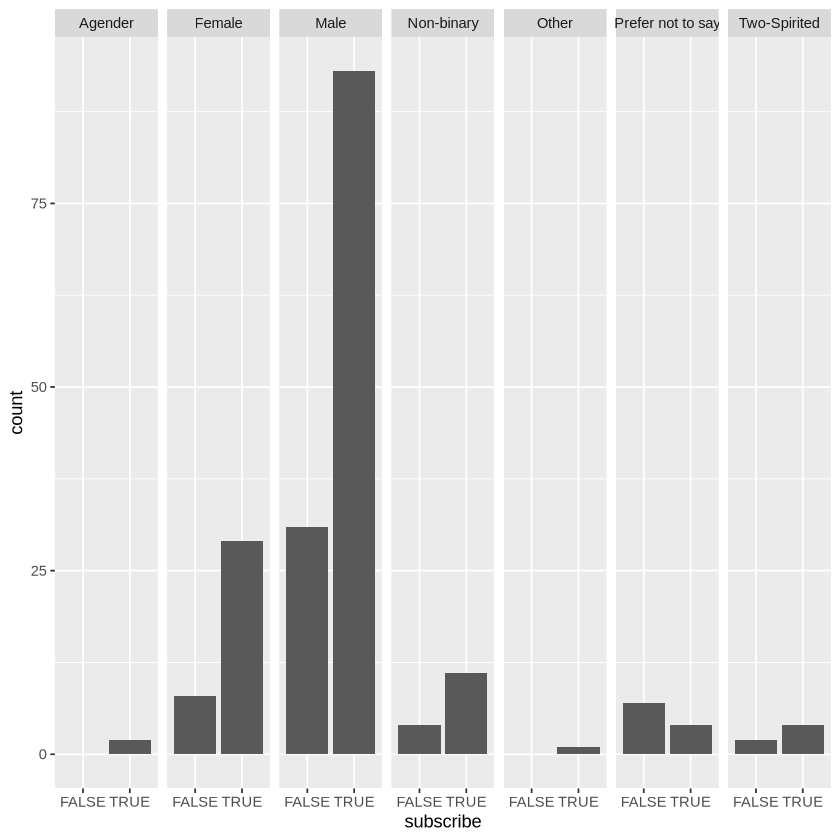

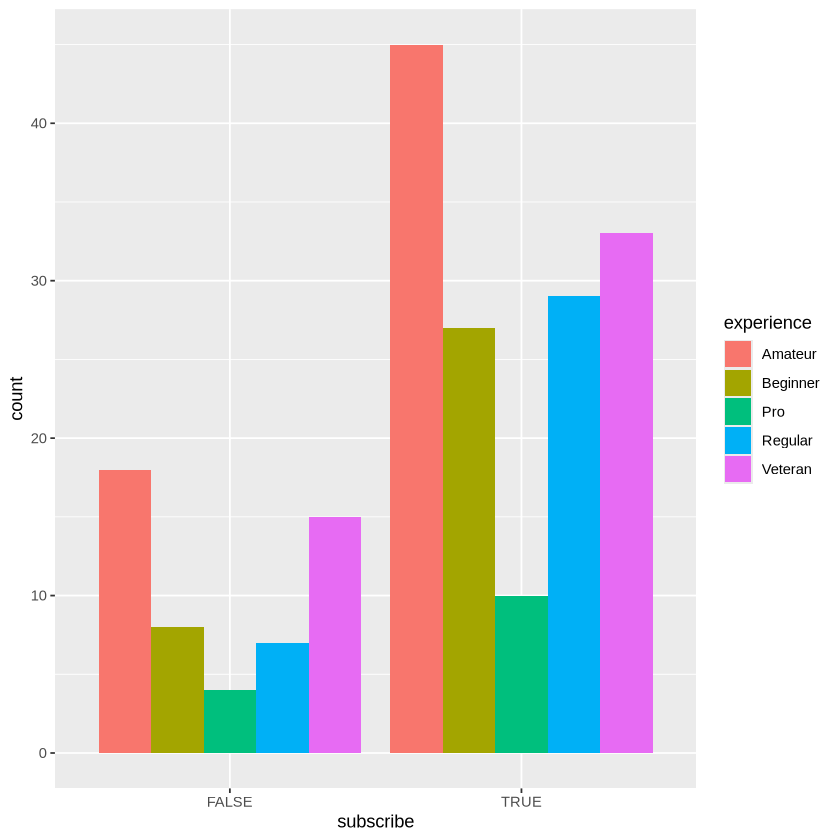

In [48]:
ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(gender))
ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge")

## 4) Method and Plan

For my Question, I plan to use **Knn-Classification** on my predicators, `Gender`, `Age`, `Experience`, `hours_played` to predict when `subscribe` = `True`.